# Importer les bibliotheques necessires

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("Set2")

In [111]:
# 1. Chargement des données
print("1. CHARGEMENT ET EXPLORATION DES DONNÉES")
print("-" * 50)

# chargement de datset credit_card.csv

df = pd.read_csv('credit_card.csv')

# Afficher les premières lignes du dataframe
print("Aperçu des données:")
print(df.head())

# Information sur les dimensions du dataset
print("\nDimensions:", df.shape)

# Description des données
print("\nDescription statistique:")
print(df.describe().T)

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values[missing_values > 0])

1. CHARGEMENT ET EXPLORATION DES DONNÉES
--------------------------------------------------
Aperçu des données:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQ

In [112]:
# 2. Prétraitement des données
print("\n2. PRÉTRAITEMENT DES DONNÉES")
print("-" * 50)

# Supprimer la colonne CUST_ID car c'est juste un identifiant
if 'CUST_ID' in df.columns:
    df = df.drop('CUST_ID', axis=1)

# Gestion des valeurs manquantes
print("Gestion des valeurs manquantes...")
# Pour CREDIT_LIMIT et MINIMUM_PAYMENTS, remplacer par la médiane
if df['CREDIT_LIMIT'].isnull().sum() > 0:
    df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
if df['MINIMUM_PAYMENTS'].isnull().sum() > 0:
    df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Vérifier qu'il n'y a plus de valeurs manquantes
print("Valeurs manquantes restantes:", df.isnull().sum().sum())

# Normalisation des données avec StandardScaler
print("Normalisation des données...")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Données normalisées (aperçu):")
print(df_scaled.head())


2. PRÉTRAITEMENT DES DONNÉES
--------------------------------------------------
Gestion des valeurs manquantes...
Valeurs manquantes restantes: 0
Normalisation des données...
Données normalisées (aperçu):
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY 


3. DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS
--------------------------------------------------
K=2, Inertie=127784.53, Score Silhouette=0.2100
K=3, Inertie=111975.04, Score Silhouette=0.2510
K=4, Inertie=99061.94, Score Silhouette=0.1977
K=5, Inertie=91490.50, Score Silhouette=0.1931
K=6, Inertie=84826.59, Score Silhouette=0.2029
K=7, Inertie=79856.16, Score Silhouette=0.2077
K=8, Inertie=74484.88, Score Silhouette=0.2217
K=9, Inertie=69828.70, Score Silhouette=0.2260
K=10, Inertie=66466.41, Score Silhouette=0.2204


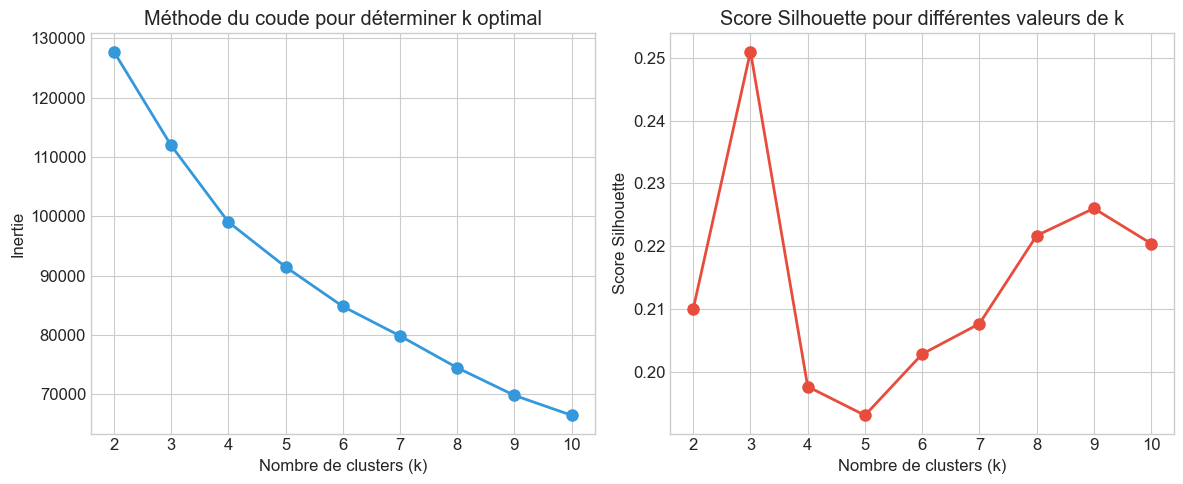


Nombre optimal de clusters basé sur l'analyse: 3


In [113]:
# 3. Détermination du nombre optimal de clusters
print("\n3. DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS")
print("-" * 50)

# Méthode du coude (Elbow Method)
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calcul du score silhouette (seulement si k >= 2)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    
    print(f"K={k}, Inertie={kmeans.inertia_:.2f}, Score Silhouette={silhouette_scores[-1]:.4f}")

# Visualisation de la méthode du coude
plt.figure(figsize=(12, 5))

# Graphique de l'inertie
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', color='#3498db', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer k optimal')

# Graphique du score silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', color='#e74c3c', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score Silhouette')
plt.title('Score Silhouette pour différentes valeurs de k')

plt.tight_layout()
#plt.savefig('kmeans_elbow_method.png')
plt.show()

# En analysant les graphiques, déterminer le nombre optimal de clusters
# Pour cet exemple, supposons que k=4 est optimal
optimal_k = 3  # À ajuster en fonction des résultats

print(f"\nNombre optimal de clusters basé sur l'analyse: {optimal_k}")

In [114]:
# 4. Application de l'algorithme K-means avec le k optimal
print("\n4. APPLICATION DE L'ALGORITHME K-MEANS")
print("-" * 50)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

# Ajouter les clusters au dataframe original
print("Distribution des clusters:")
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

for i in range(optimal_k):
    percentage = (cluster_counts[i] / len(df)) * 100
    print(f"Cluster {i}: {cluster_counts[i]} clients ({percentage:.2f}%)")


4. APPLICATION DE L'ALGORITHME K-MEANS
--------------------------------------------------
Distribution des clusters:
Cluster
0    1275
1    6114
2    1561
Name: count, dtype: int64
Cluster 0: 1275 clients (14.25%)
Cluster 1: 6114 clients (68.31%)
Cluster 2: 1561 clients (17.44%)



5. VISUALISATION DES CLUSTERS
--------------------------------------------------


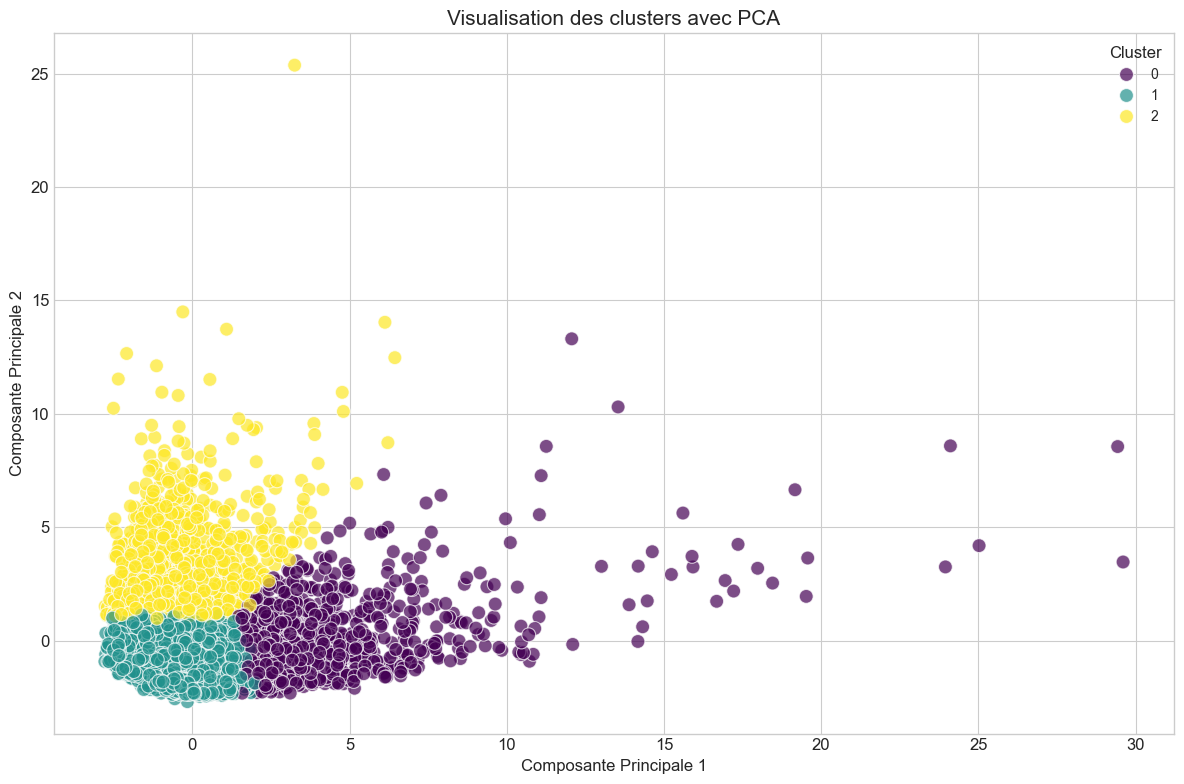

In [115]:
# 5. Visualisation des clusters
print("\n5. VISUALISATION DES CLUSTERS")
print("-" * 50)

# Réduction de dimensionnalité avec PCA pour visualisation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Visualisation des clusters avec PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisation des clusters avec PCA', fontsize=15)
plt.xlabel('Composante Principale 1', fontsize=12)
plt.ylabel('Composante Principale 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
#plt.savefig('kmeans_clusters_pca.png')
plt.show()


6. ANALYSE DES CARACTÉRISTIQUES DES CLUSTERS
--------------------------------------------------
Caractéristiques moyennes par cluster:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        2182.352833           0.981702  4187.017796       2663.995153   
1         807.722510           0.834577   496.062522        247.273214   
2        4023.788865           0.959193   389.051448        252.333261   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                   1523.493231    449.753140             0.948175   
1                    249.110368    338.996760             0.460353   
2                    136.797412   3917.254973             0.233899   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                              

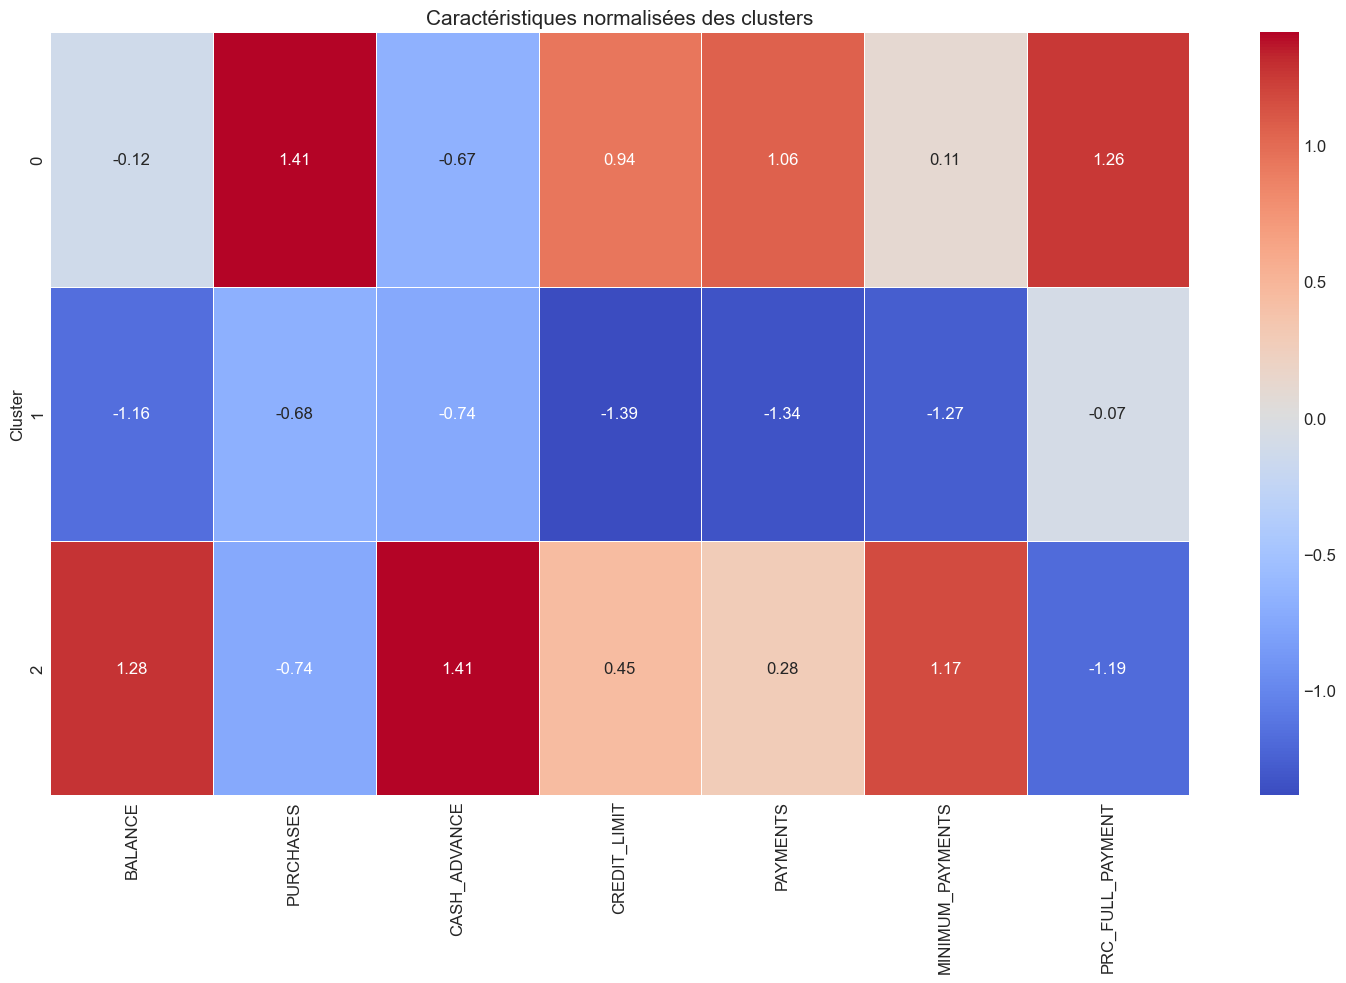

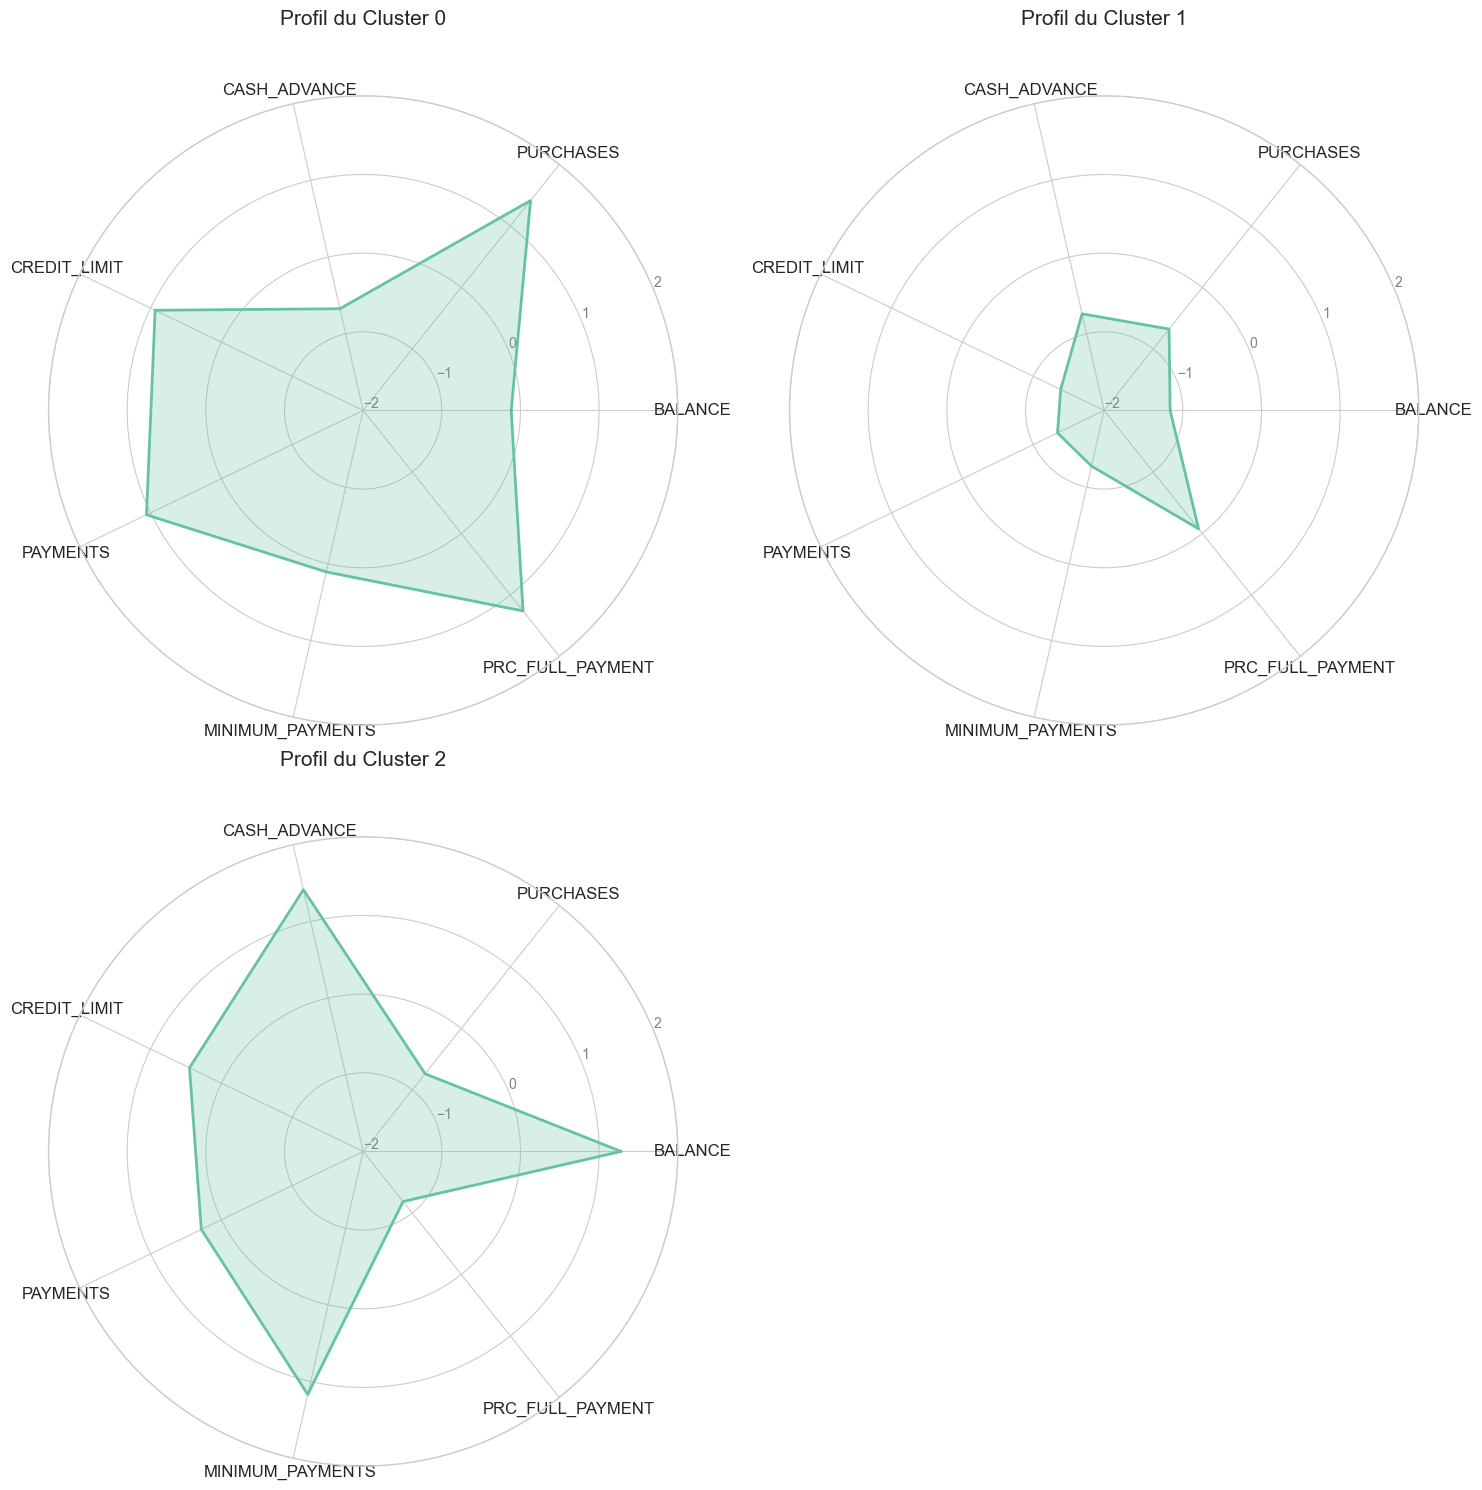

In [116]:
# 6. Analyse des caractéristiques des clusters
print("\n6. ANALYSE DES CARACTÉRISTIQUES DES CLUSTERS")
print("-" * 50)

# Ajouter les informations de cluster au dataset original
df_with_clusters = df.copy()

# Calcul des moyennes par cluster pour chaque variable
cluster_analysis = df_with_clusters.groupby('Cluster').mean()
print("Caractéristiques moyennes par cluster:")
print(cluster_analysis)

# Visualisation des caractéristiques des clusters
plt.figure(figsize=(15, 10))

# Sélectionner quelques variables importantes pour la visualisation
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

cluster_analysis_subset = cluster_analysis[key_features]

# Normaliser pour la visualisation
scaler_viz = StandardScaler()
cluster_analysis_norm = scaler_viz.fit_transform(cluster_analysis_subset)
cluster_analysis_norm_df = pd.DataFrame(cluster_analysis_norm, 
                                        index=cluster_analysis.index, 
                                        columns=key_features)

# Heatmap des caractéristiques des clusters
sns.heatmap(cluster_analysis_norm_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Caractéristiques normalisées des clusters', fontsize=15)
plt.tight_layout()
#plt.savefig('kmeans_cluster_features.png')
plt.show()

# Graphiques radar pour visualiser le profil de chaque cluster
# Préparer les données pour le graphique radar
categories = key_features
N = len(categories)

# Créer un graphique radar pour chaque cluster
plt.figure(figsize=(15, 15))

for cluster_id in range(optimal_k):
    values = cluster_analysis_norm_df.iloc[cluster_id].values.tolist()
    values.append(values[0])  # Fermer le polygone
    
    # Angles pour le radar plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles.append(angles[0])  # Fermer le polygone
    
    # Subplot
    ax = plt.subplot(2, 2, cluster_id + 1, polar=True)
    
    # Plot du radar
    plt.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {cluster_id}")
    plt.fill(angles, values, alpha=0.25)
    
    # Personnalisation
    plt.xticks(angles[:-1], categories, size=12)
    plt.yticks([-2, -1, 0, 1, 2], color="grey", size=10)
    plt.title(f'Profil du Cluster {cluster_id}', size=15, y=1.1)

plt.tight_layout()
#plt.savefig('kmeans_radar_plots.png')
plt.show()

In [117]:
# 7. Interprétation des profils clients
print("\n7. INTERPRÉTATION DES PROFILS CLIENTS")
print("-" * 50)

# Analyse plus détaillée de chaque cluster
for i in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == i]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_with_clusters)) * 100
    
    print(f"\n=== CLUSTER {i} ===")
    print(f"Taille: {cluster_size} clients ({cluster_pct:.2f}%)")
    
    # Top 5 des caractéristiques distinctives (les plus éloignées de la moyenne globale)
    cluster_means = cluster_data.mean()
    global_means = df_with_clusters.mean()
    
    # Calcul des écarts par rapport à la moyenne globale
    differences = (cluster_means - global_means) / global_means * 100
    differences = differences.drop('Cluster')  # Exclure la colonne Cluster
    
    print("\nCaractéristiques distinctives:")
    top_features_positive = differences.nlargest(3)
    top_features_negative = differences.nsmallest(3)
    
    for feature, diff in top_features_positive.items():
        print(f"- {feature}: {diff:.2f}% au-dessus de la moyenne globale")
        
    for feature, diff in top_features_negative.items():
        print(f"- {feature}: {abs(diff):.2f}% en-dessous de la moyenne globale")
    
    # Interprétation des profils (à personnaliser selon les résultats réels)
    print("\nProfil client potentiel:")
    
    if i == 0:
        print("Ce segment pourrait représenter des 'utilisateurs occasionnels' qui utilisent rarement leur carte.")
    elif i == 1:
        print("Ce segment pourrait représenter des 'gros acheteurs' qui font beaucoup d'achats mais paient régulièrement.")
    elif i == 2:
        print("Ce segment pourrait représenter des 'utilisateurs d'avances de fonds' qui utilisent fréquemment les avances de fonds.")
    elif i == 3:
        print("Ce segment pourrait représenter des 'titulaires de solde élevé' qui maintiennent des soldes importants sur leurs cartes.")



7. INTERPRÉTATION DES PROFILS CLIENTS
--------------------------------------------------

=== CLUSTER 0 ===
Taille: 1275 clients (14.25%)

Caractéristiques distinctives:
- ONEOFF_PURCHASES: 349.67% au-dessus de la moyenne globale
- PURCHASES: 317.36% au-dessus de la moyenne globale
- PURCHASES_TRX: 278.61% au-dessus de la moyenne globale
- CASH_ADVANCE: 54.05% en-dessous de la moyenne globale
- CASH_ADVANCE_FREQUENCY: 53.82% en-dessous de la moyenne globale
- CASH_ADVANCE_TRX: 53.60% en-dessous de la moyenne globale

Profil client potentiel:
Ce segment pourrait représenter des 'utilisateurs occasionnels' qui utilisent rarement leur carte.

=== CLUSTER 1 ===
Taille: 6114 clients (68.31%)

Caractéristiques distinctives:
- PRC_FULL_PAYMENT: 0.26% au-dessus de la moyenne globale
- TENURE: -0.36% au-dessus de la moyenne globale
- BALANCE_FREQUENCY: -4.87% au-dessus de la moyenne globale
- CASH_ADVANCE: 65.37% en-dessous de la moyenne globale
- CASH_ADVANCE_TRX: 61.93% en-dessous de la moye